Creating ANN using pytorch

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
import seaborn as sns
import numpy as np

In [5]:
data['Outcome']=np.where(data['Outcome']==1,"Diabetic","No-Diabetic")

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,No-Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,No-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


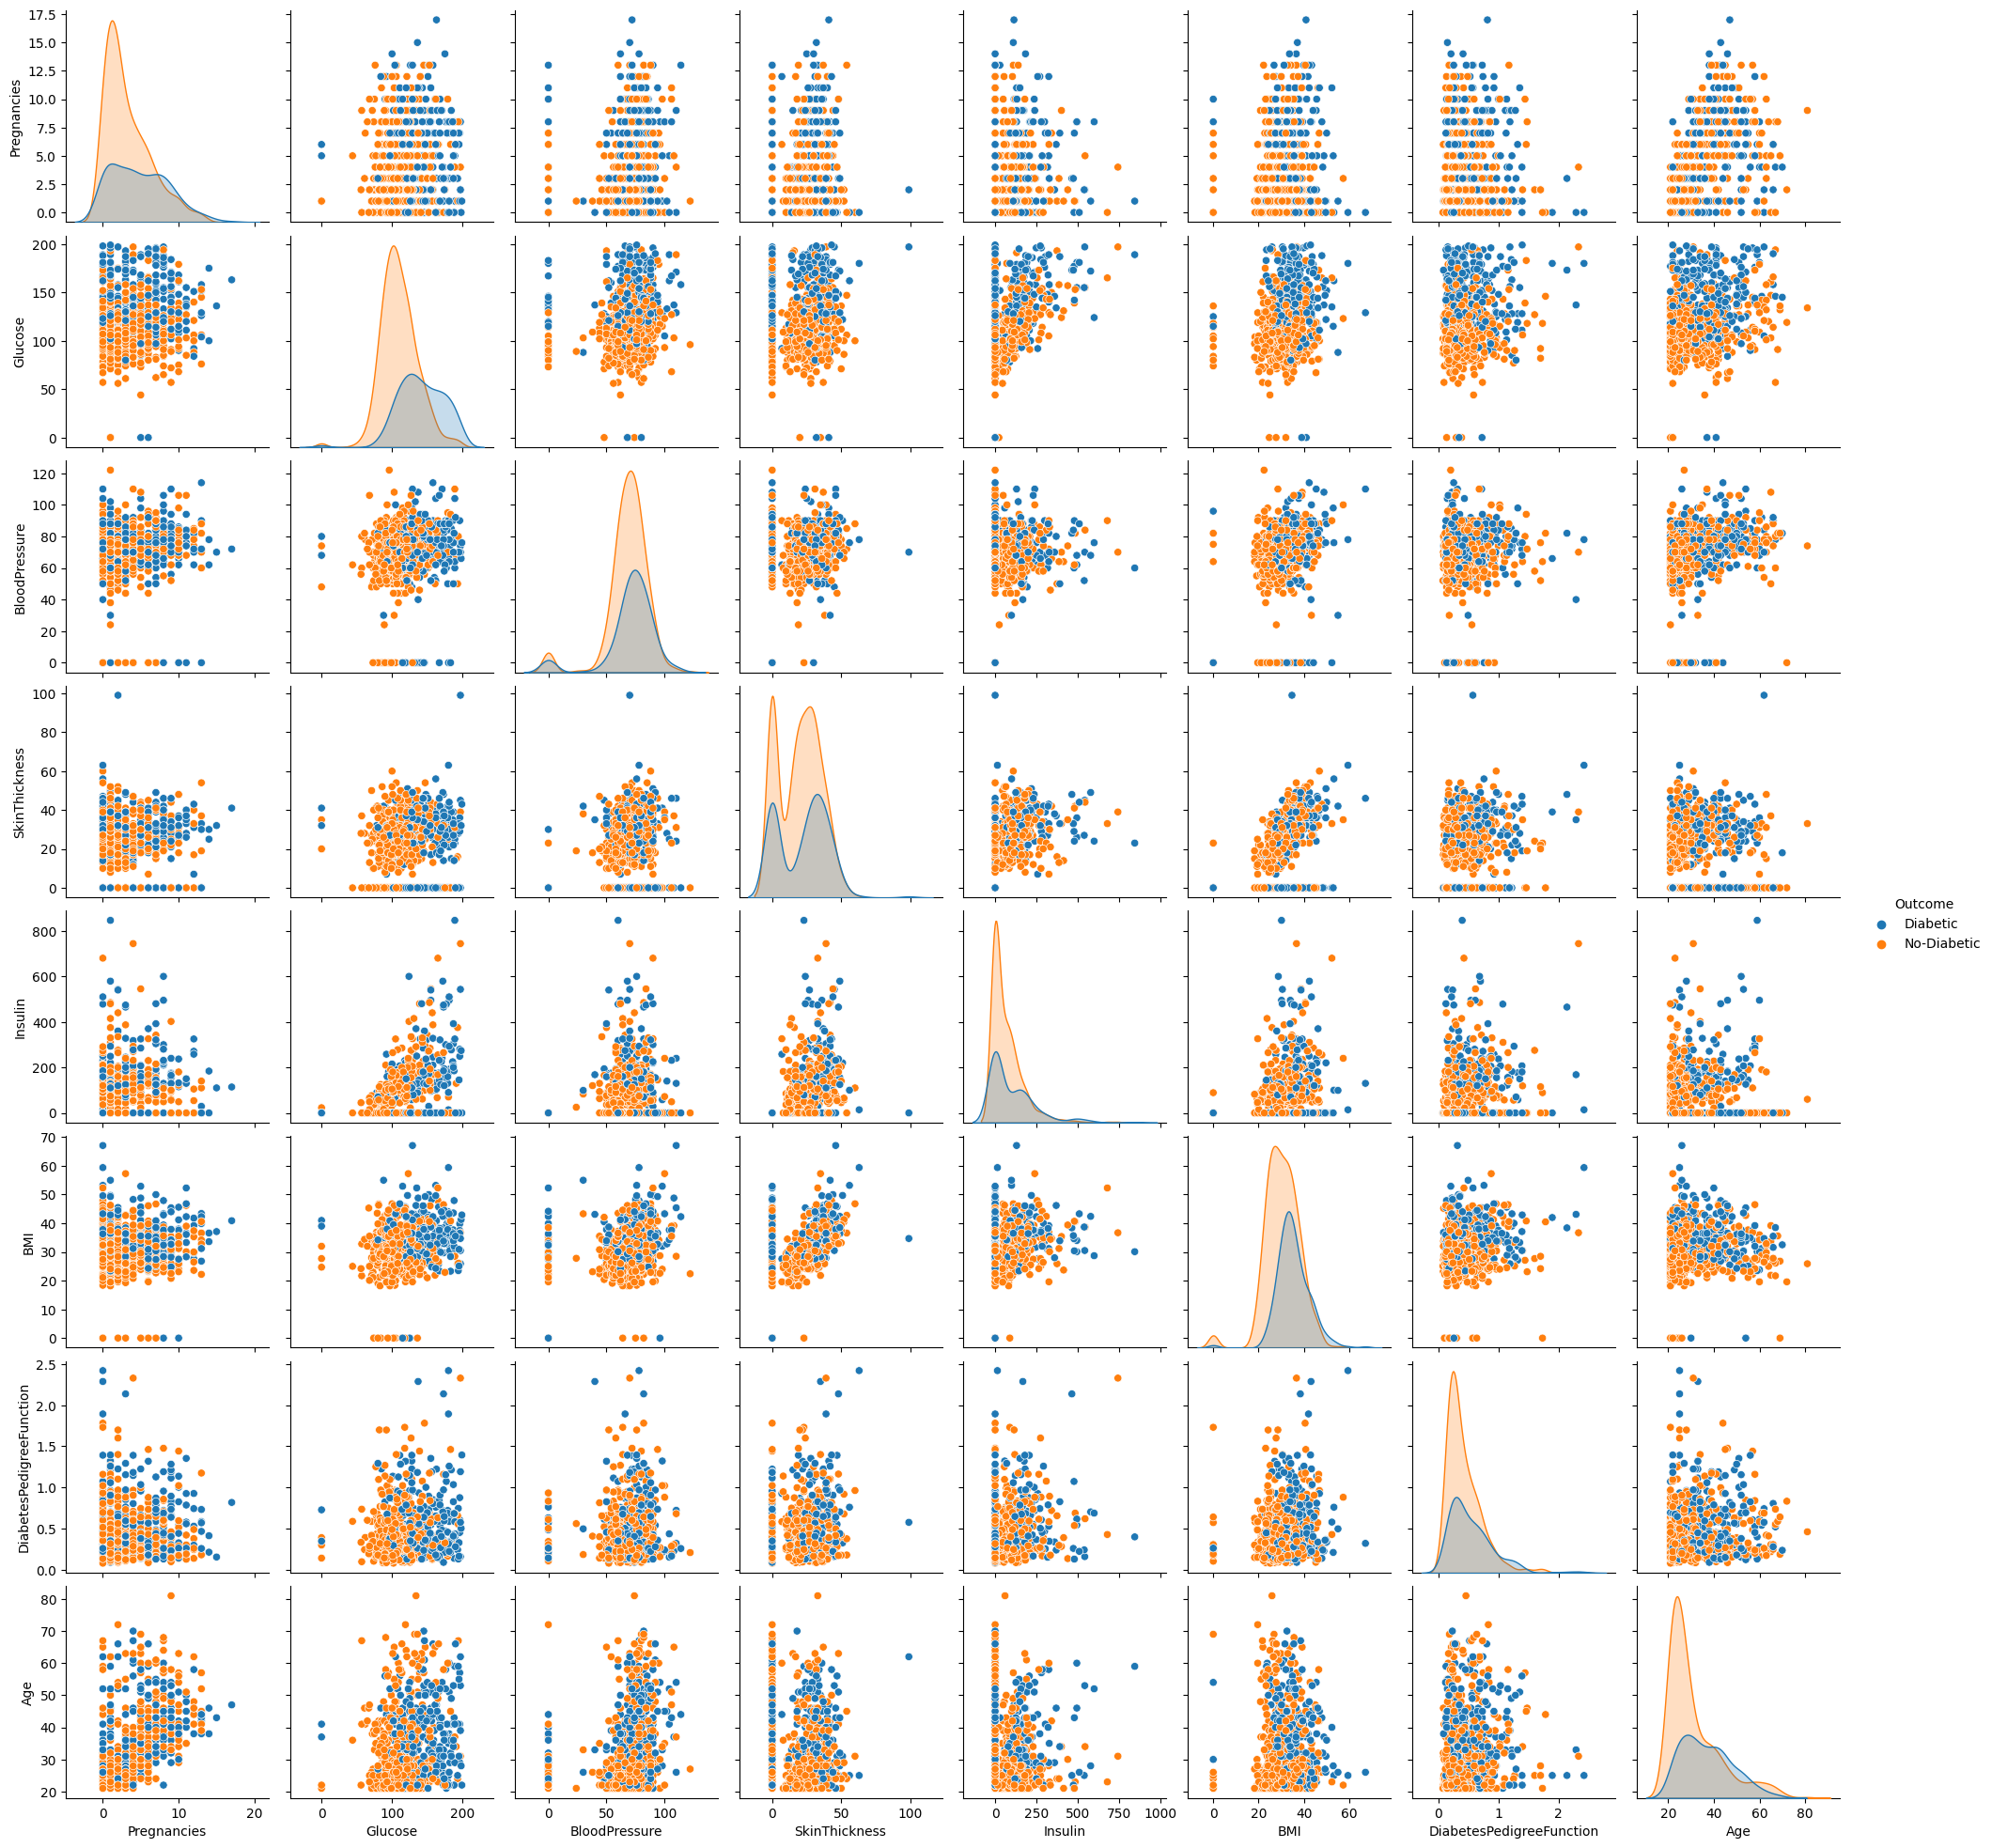

In [7]:
sns.pairplot(data,hue="Outcome")

In [8]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
X = data.drop('Outcome',axis=1).values # independent feature
y = data['Outcome'].values #dependent feature

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
#libriries from pytorch
import torch
import torch.nn as nn  
import torch.nn.functional as f 


In [12]:
#creating tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
data.shape

(768, 9)

In [14]:
#creating model with pytorch
class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
        
    def forward(self,x):
        x=f.relu(self.f_connected1(x))
        x=f.relu(self.f_connected2(x))
        x=self.out(x)
        return x    

In [15]:
#instantiate my ANN_Model
torch.manual_seed(20)
model = ANN_Model()

In [16]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [17]:
#Backward Prapogation Defines the loss_function defines the optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [18]:
epochs = 500
final_losses=[]

for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss.item())
    
    if i%10==1:
        print("Epoch number : {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()    

Epoch number : 1 and the loss : 3.4572105407714844
Epoch number : 11 and the loss : 0.8019207119941711
Epoch number : 21 and the loss : 0.609032154083252
Epoch number : 31 and the loss : 0.5917771458625793
Epoch number : 41 and the loss : 0.5679708123207092
Epoch number : 51 and the loss : 0.5529041886329651
Epoch number : 61 and the loss : 0.5410094857215881
Epoch number : 71 and the loss : 0.5310389995574951
Epoch number : 81 and the loss : 0.5220361351966858
Epoch number : 91 and the loss : 0.5135971903800964
Epoch number : 101 and the loss : 0.5061254501342773
Epoch number : 111 and the loss : 0.49834102392196655
Epoch number : 121 and the loss : 0.49605512619018555
Epoch number : 131 and the loss : 0.48286372423171997
Epoch number : 141 and the loss : 0.4756035804748535
Epoch number : 151 and the loss : 0.483346551656723
Epoch number : 161 and the loss : 0.48827385902404785
Epoch number : 171 and the loss : 0.46933698654174805
Epoch number : 181 and the loss : 0.4662608802318573
E

In [19]:
#plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

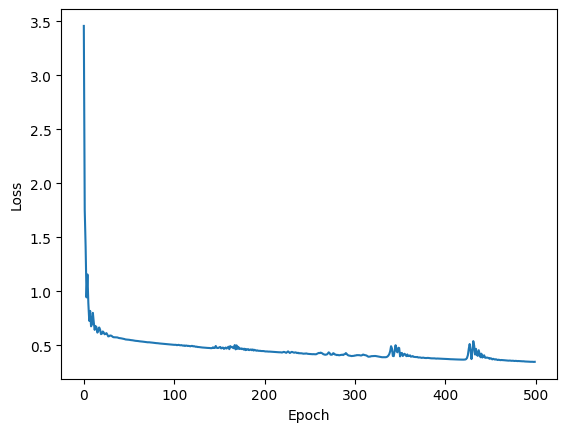

In [20]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [21]:
#predication in X_test data
predications=[]
with torch.no_grad():
    for i, data in enumerate(X_test):
        
        y_pred=model(data)
        predications.append(y_pred.argmax().item())
        print(y_pred.argmax().item())
    

1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predications)
cm 

array([[91, 16],
       [17, 30]], dtype=int64)

Text(95.72222222222221, 0.5, 'Ptredicated Values')

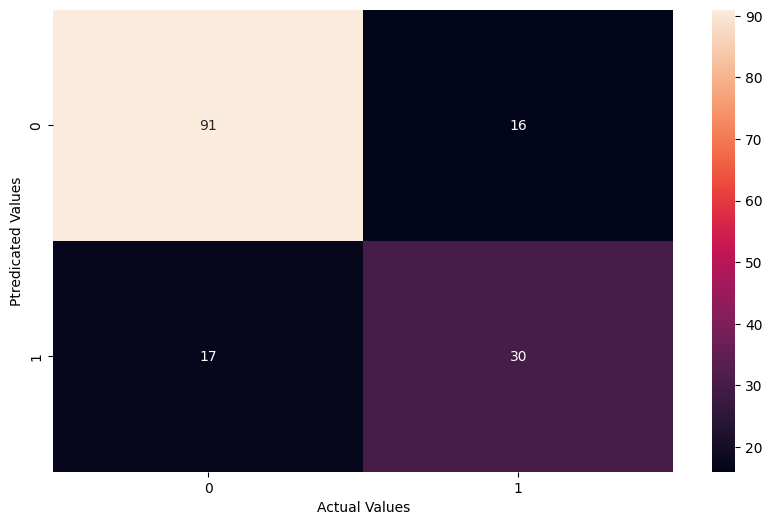

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Ptredicated Values')

In [25]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,predications)
score

0.7857142857142857

In [27]:
#Save the Model
torch.save(model,'diabetes.pt')

In [28]:
#Save and load the model
model = torch.load('diabetes.pt')

In [29]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [32]:
#predication of new data points
lst1 = [6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [33]:
new_data = torch.tensor(lst1)

In [34]:
#ptredication new data using pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([0.8705, 2.4638])
1
